# 2018 Results Analysis

This notebook contains some analysis of the results of the 2018 season. It includes all Wednesday and Friday evening races over the season but excludes mayhems, pursuit races, club champs and winter series.

Start by defining some useful functions.

In [1]:
import urllib.request
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


column_headings = ["HelmName", "Class", "PY", "SailNo", "Fleet", "Rank", "Elapsed", "Corrected", "Points", "Reg No.", "Reg Date"]
alternative_headings = ["HelmName", "Class", "PY", "SailNo", "Fleet", "Rank", "Place", "Points", "Reg No.", "Reg Date"]
fleets = ['Superfast', 'Fast', 'Medium', 'Slow']

plt.rcParams['figure.figsize'] = [20, 10]


def scrape_race(url):
    """Scrape all the results for a single race."""
    print(url)
    with urllib.request.urlopen(url) as response:
       html = response.read()
    
    soup = BeautifulSoup(html)
    
    tables = soup.findAll('table')
    return tables[:4]


def get_dataframe_from(table):
    """Turn a table into a data frame."""
    table_rows = table.find_all('tr')
    l = []
    for tr in table_rows[1:]:
        td = tr.find_all('td')
        row = [tr.text for tr in td]
        l.append(row)
        
    # Different column headers are used if there were no results recorded in a fleet.
    if l and len(l[0]) == 11:        
        df = pd.DataFrame(l, columns=column_headings)
    else:
        df = pd.DataFrame(l, columns=alternative_headings)
        
    return df

Import all results for all Wednesday and Friday races.

In [2]:
base_url = 'https://www.warsashsc.org.uk/results/18'
series = ['wa', 'wb', 'wc', 'fa', 'fb', 'fc']

all_races_frames = []
race_on = []

for s in series:
    for i in range(1, 9):
        try:
            race = scrape_race(base_url + s + str(i) + '.htm')
            
            for table in race:
                df = get_dataframe_from(table)
                df['Day'] = s[0]
                df['Series'] = s[1]
                df['Race'] = i

                all_races_frames.append(df)
                
            race_on.append(True)
        except:
            print('No racing')
            race_on.append(False)
        
        
            
all_races = pd.concat(all_races_frames, sort=True)

https://www.warsashsc.org.uk/results/18wa1.htm
https://www.warsashsc.org.uk/results/18wa2.htm
https://www.warsashsc.org.uk/results/18wa3.htm
https://www.warsashsc.org.uk/results/18wa4.htm
https://www.warsashsc.org.uk/results/18wa5.htm
https://www.warsashsc.org.uk/results/18wa6.htm
https://www.warsashsc.org.uk/results/18wa7.htm
https://www.warsashsc.org.uk/results/18wa8.htm
https://www.warsashsc.org.uk/results/18wb1.htm
https://www.warsashsc.org.uk/results/18wb2.htm
https://www.warsashsc.org.uk/results/18wb3.htm
https://www.warsashsc.org.uk/results/18wb4.htm
https://www.warsashsc.org.uk/results/18wb5.htm
https://www.warsashsc.org.uk/results/18wb6.htm
https://www.warsashsc.org.uk/results/18wb7.htm
https://www.warsashsc.org.uk/results/18wb8.htm
https://www.warsashsc.org.uk/results/18wc1.htm
https://www.warsashsc.org.uk/results/18wc2.htm
https://www.warsashsc.org.uk/results/18wc3.htm
https://www.warsashsc.org.uk/results/18wc4.htm
https://www.warsashsc.org.uk/results/18wc5.htm
No racing
htt

## Race Stats

In [3]:
print('There were a total of %i results recorded.' % len(all_races.index))

print('There were a total of %i OCSs.' % (all_races['Elapsed'] == 'OCS').sum())

print('There were a total of %i duties recorded.' %(all_races['Elapsed'] == 'Duty').sum())

print('There were a total of %i DNFs recorded.' % (all_races['Elapsed'] == 'DNF').sum())

excluding_duties = all_races[~all_races['Elapsed'].isin(['Duty'])]
print('There were %i results posted excluding duties.' % len(excluding_duties.index))

only_finishes = all_races[~all_races['Elapsed'].isin(['Duty', 'OCS', 'DNE', 'DNF', 'DSQ', 'AVG'])]
print('There were %i finishes recorded.' % len(only_finishes.index))

There were a total of 1337 results recorded.
There were a total of 22 OCSs.
There were a total of 87 duties recorded.
There were a total of 136 DNFs recorded.
There were 1250 results posted excluding duties.
There were 1082 finishes recorded.


## Class Analysis

In [4]:
classes_frequency = excluding_duties['Class'].value_counts()

py_by_class = {}
for c in excluding_duties['Class'].unique():
    py_by_class[c] = excluding_duties.loc[excluding_duties['Class'] == c, 'PY'].iloc[0]

print('%i different classes raced in 2018' % len(classes_frequency))
print(classes_frequency)

37 different classes raced in 2018
RS 400           169
BLAZE             96
RS AERO 7         94
TOPPER            87
FINN              85
WAYFARER          84
LASER 4.7         80
BUZZ              63
LASER RADIAL      55
LASER PICO        41
RS 200            40
LASER 2000        37
HADRON H2         31
D ONE             25
LASER             24
STREAKER          24
WANDERER          23
NAT 12            20
RS FEVA XL        20
CONTENDER         17
MIRROR            17
GRADUATE          17
420               15
RS 300            15
D ZERO            14
KESTREL            9
LASER STRATOS      9
ALBACORE           8
D ZERO BLUE        8
LASER VAGO XD      6
TASAR              5
HOBIE 405          3
RS AERO 5          3
OSPREY             3
LARK               1
Hobie 405          1
RS 100 8.4         1
Name: Class, dtype: int64


Text(0.5, 1.0, 'Distribution of races completed by PY')

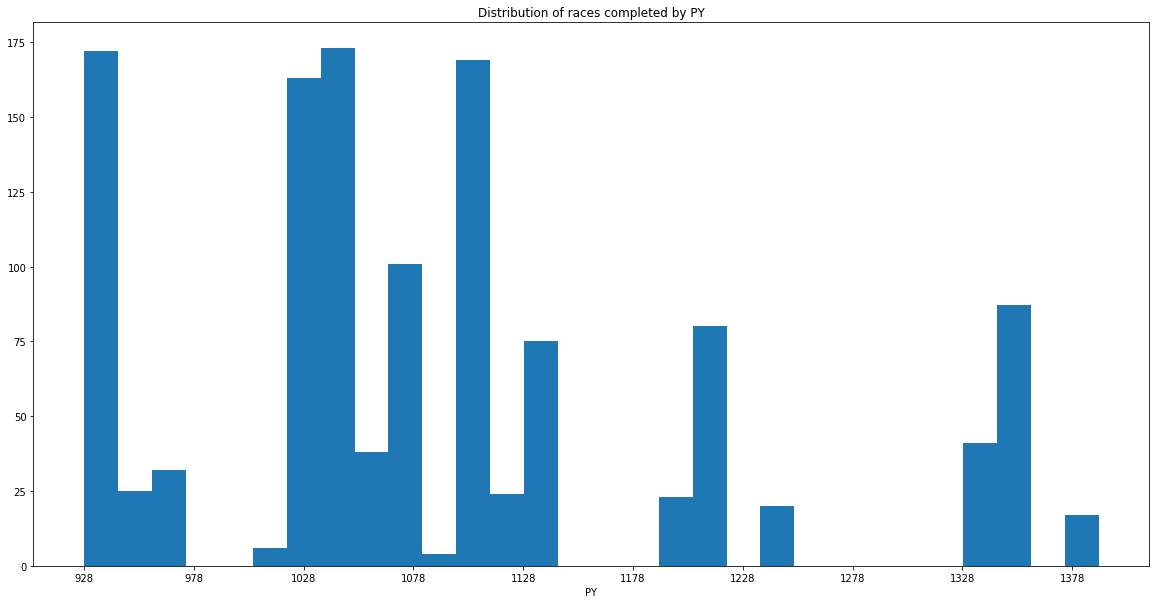

In [13]:
pys = excluding_duties['PY'].astype(int).tolist()

plt.hist(pys, bins=30)
plt.xlabel('PY')
plt.xticks(np.arange(min(pys), max(pys), 50))
plt.title('Distribution of races completed by PY')

## Series Analysis

In [10]:
print('Wednesday series total results')
print(excluding_duties[excluding_duties['Day'] == 'w']['Series'].value_counts())
print('Friday series total results')
print(excluding_duties[excluding_duties['Day'] == 'f']['Series'].value_counts())

Wednesday series total results
a    277
b    260
c    160
Name: Series, dtype: int64
Friday series total results
a    226
b    199
c    128
Name: Series, dtype: int64


In [14]:
# Count the numbers in each fleet in each Wednesday race.
fleet_numbers = {}
for fleet in fleets:
    fleet_numbers[fleet] =[]

wednesdays = excluding_duties[excluding_duties['Day'] == 'w']
for s in ['a', 'b', 'c']:
    wed_series = wednesdays[wednesdays['Series'] == s]
    for r in range(1, 9):
        race_numbers = wed_series[wed_series['Race'] == r]['Fleet'].value_counts()
        for fleet in fleets:
            if fleet in race_numbers:
                fleet_numbers[fleet].append(race_numbers[fleet])
            else:
                fleet_numbers[fleet].append(0)

In [15]:
for fleet in fleets:
    # Remove cancelled races
    frequencies = [n for i, n in enumerate(fleet_numbers[fleet]) if race_on[i]]
                   
    print(fleet)
    print('Min = %i' % min(frequencies))
    print('Max = %i' % max(frequencies))
    print('Mean = %i' % np.mean(frequencies))
    print('Median = %i' % np.median(frequencies))
    print()

Superfast
Min = 3
Max = 14
Mean = 8
Median = 8

Fast
Min = 9
Max = 25
Mean = 16
Median = 17

Medium
Min = 1
Max = 9
Mean = 4
Median = 5

Slow
Min = 0
Max = 6
Mean = 2
Median = 3



Text(0.5, 1.0, 'Numbers in Each Fleet on Wednesdays')

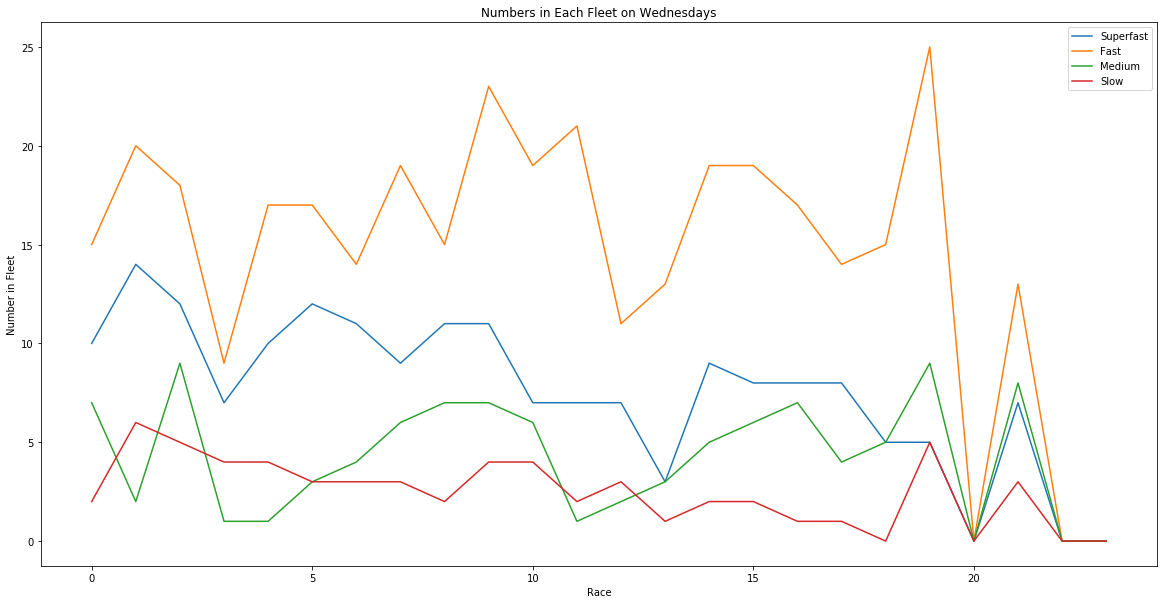

In [16]:
for fleet in fleets:
    plt.plot((fleet_numbers[fleet]), label=fleet)
plt.legend(fleets)
plt.xlabel('Race')
plt.ylabel('Number in Fleet')
plt.title('Numbers in Each Fleet on Wednesdays')

## Race Lengths

In [17]:
ftr = [3600, 60, 1]
i = 0
lengths_by_fleet = {}
for fleet in fleets:
    lengths_by_fleet[fleet] =[]
    
wednesday_finishes = only_finishes[only_finishes['Day'] == 'w']
for s in ['a', 'b', 'c']:
    wed_series = wednesday_finishes[wednesday_finishes['Series'] == s]
    for r in range(1, 9):
        if race_on[i]:
            results_for_race = wed_series[wed_series['Race'] == r]
            for fleet in fleets:
                results_for_fleet = results_for_race[results_for_race['Fleet'] == fleet]
                for i, result in results_for_fleet.iterrows():
                    try:
                        time_in_s = sum([a*b for a,b in zip(ftr, map(int, result['Elapsed'].split(':')))])
                        lengths_by_fleet[fleet].append(time_in_s)
                    except Exception as e:
                        pass
    i += 1

In [18]:
for fleet in fleets:                  
    print(fleet)
    print('Min = %i' % min(lengths_by_fleet[fleet]))
    print('Max = %i' % max(lengths_by_fleet[fleet]))
    print('Mean = %i' % np.mean(lengths_by_fleet[fleet]))
    print('Median = %i' % np.median(lengths_by_fleet[fleet]))
    print()

Superfast
Min = 2638
Max = 6191
Mean = 4402
Median = 4355

Fast
Min = 2238
Max = 6272
Mean = 4272
Median = 4162

Medium
Min = 1831
Max = 5430
Mean = 3560
Median = 3630

Slow
Min = 2168
Max = 5414
Mean = 3315
Median = 3119



Text(0.5, 1.0, 'Distribution of Wednesday Race Times for Superfast')

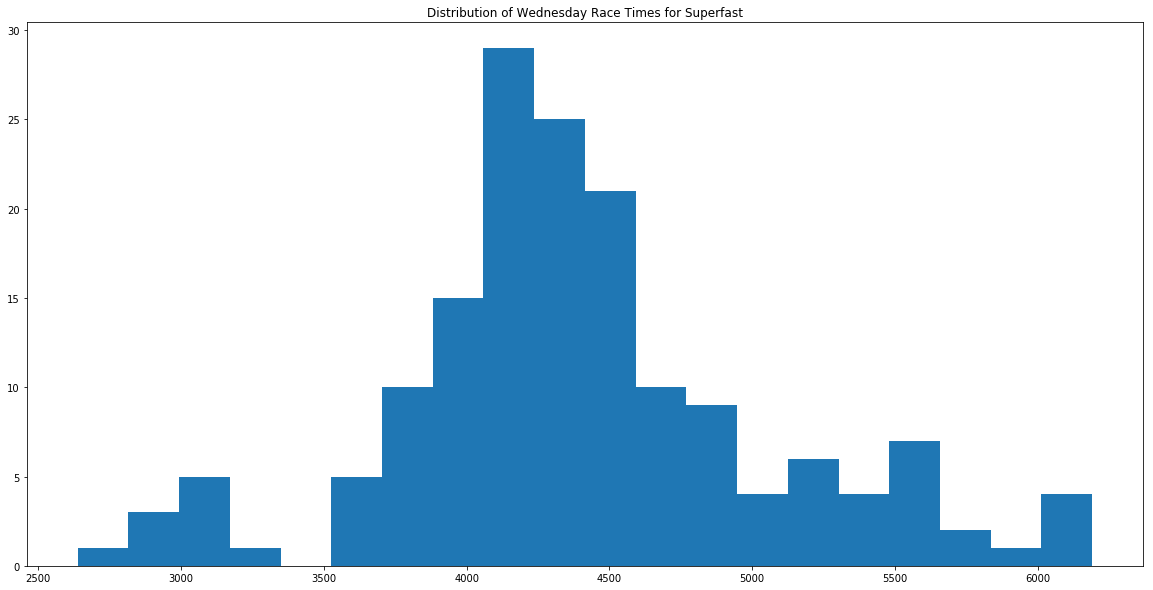

In [21]:
plt.hist(lengths_by_fleet['Superfast'], bins=20)
plt.title('Distribution of Wednesday Race Times for Superfast')

In [ ]:
plt.hist(lengths_by_fleet['Fast'], bins=20)
plt.title('Distribution of Wednesday Race Times for Fast')

In [ ]:
plt.hist(lengths_by_fleet['Medium'], bins=20)
plt.title('Distribution of Wednesday Race Times for Medium')

In [ ]:
plt.hist(lengths_by_fleet['Slow'], bins=20)
plt.title('Distribution of Wednesday Race Times for Slow')

## Sailors

In [19]:
excluding_duties['HelmName'].value_counts()

Mark Turner            33
Heather Aitken         32
Trevor Bryant          30
Bruce Mills            30
Stuart Aitken          29
Rob Jones              28
Isaac Greaves          28
Tim Norris             27
Bob Cowan              26
John Heyes             25
Edwin Van Der Merwe    25
Mary Ann Paddison      23
Steven Sherwood        22
Amy Smith              22
David Swift            21
Peter Vinton           21
Geoff Camm             21
Nick Thorne            21
Phil Bull              21
Andy Powell            20
Phoebe Hutchings       20
Lizzy McCormack        19
Martin Hughes          18
Andrew Bell            18
Tom Crew               18
Freya Anderson         18
Tim Freeman            18
Matt Johnston          17
Ian Dawson             17
Andy McCormack         17
                       ..
Jeremy Smart            3
Charlotte Jenkins       3
Will Jarman             3
Mathias Potter          3
Andrew Blundell         3
Bryony Sharpen          3
Kai Miller              3
Amanda Baile